In [1]:
import urllib.request
import json
import dml
import prov.model
import datetime 
import uuid
import sys
from multiprocessing import Process
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import googlemaps

In [2]:
client = dml.pymongo.MongoClient()
repo = client.repo
repo.authenticate('minteng_tigerlei_zhidou', 'minteng_tigerlei_zhidou')

True

In [3]:
districtNum = repo['minteng_tigerlei_zhidou.box_count'].count()
crimeVector = np.zeros([6, districtNum, 12])

In [4]:
for date, dNum in zip(repo['minteng_tigerlei_zhidou.box_count'].find(), range(districtNum)):
    area = repo['minteng_tigerlei_zhidou.crime'].find({'location':{'$geoWithin':{ '$box': date['box']}}})
    if dNum == 27:
        block27 = date
    for event in area:
        crimeVector[event['year'] - 2012][dNum][event['month'] - 1] += 1

In [5]:
corrfP = [ [stats.pearsonr(crimeVector[i][k], crimeVector[i + 1][k]) for k in range(districtNum)] for i in range(5) ]

/Users/douzhi/Software/anaconda3/envs/cs505/lib/python3.5/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [6]:
np.set_printoptions(suppress=True)

The figure below shows the number of crime in block 27 in 2013, 2014, 2015, 2015

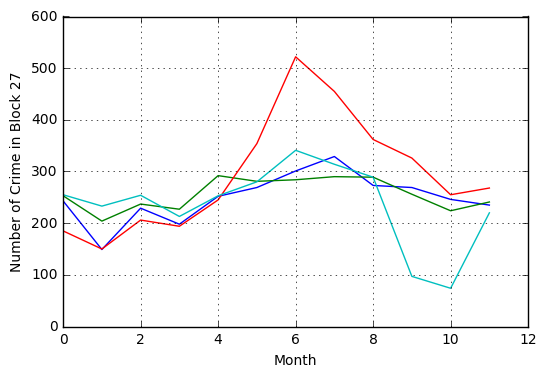

In [7]:
plt.xlabel('Month',size=10)
plt.ylabel('Number of Crime in Block 27',size=10)
plt.grid(True)

plt.plot(range(0,12), crimeVector[1:5, 27].transpose())
# plt.savefig('Block27.png')
plt.show()

In [9]:
xs = np.array(range(12))

In [10]:
xs = np.concatenate([xs, xs])
xs = np.concatenate([xs, xs])

In [11]:
temp = crimeVector[1:5,27]

In [12]:
temp = crimeVector[1:5,27]
y =temp[0]
for i in range(1, 4):
    y = np.concatenate([y, temp[i]])

In [13]:
p = np.poly1d(np.polyfit(xs, y, 3))

The figure below shows trend of the number of crime in block 27

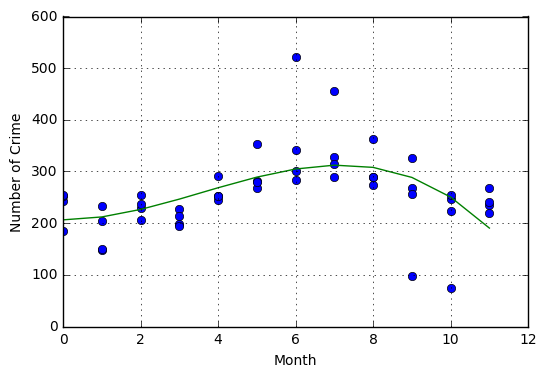

In [14]:
xp = np.array(range(12))
plt.xlabel('Month',size=10)
plt.ylabel('Number of Crime',size=10)
plt.grid(True)
_ = plt.plot(xs, y, 'o', xp, p(xp), '-')
plt.show()

# plt.savefig('fitting.png')